In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
%run ../Scripts/plotVelocity.py

In [2]:
foldername_itr = []
betas = [-0.001, -0.01, -0.2, -0.5,-0.1, 0, 0.2, 0.5, 0.1, 0.001, 0.01,]
seeds = [0]
for beta in betas:
    for seed in seeds:
        foldername = f"../Data_Beta_Short/beta{beta}_seed{seed}"
        foldername_itr.append(foldername)

In [3]:
def get_count_single(init_list, params, sim_params):
    count_all_root = []

    for root_node in init_list:
        for trajs in root_node.get_all_traversals():
            positions = [x.mean for x in trajs]
            time = [x.frame for x in trajs]
            time_avg = average_of_pairs(time)
            
            counts = np.array([x.count for x in trajs])
            if len(counts)>0:
                count_all_root.extend(counts)
            # count_all_root = np.concatenate([count_all_root, np.mean(counts)], axis=0)

    return  np.mean(count_all_root), np.var(count_all_root)

In [4]:
count_beta = np.zeros(len(betas))
var_count_beta = np.zeros(len(betas))

for foldername in foldername_itr:

    with open(foldername + "/params.json") as json_file:
        params = json.load(json_file)
    with open(foldername + "/sim_params.json") as json_file:
        sim_params = json.load(json_file)

    init_list = []
    tree_index = 0
    tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    while(os.path.isfile(tree_path)):
        # print("tree loaded:", tree_index)
        init_list.append(TreeNode.load_tree(tree_path))
        tree_index += 1
        tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    
        count, var_count = get_count_single(init_list, params, sim_params)
    print(count)
    
    index = betas.index(params["beta"])
    # print(i)
    count_beta[index] += count
    var_count_beta[index] += np.sqrt(var_count)

count_beta = count_beta/len(seeds)
var_count_beta = var_count_beta/len(seeds)

6768.15
1663.21
7635.7
4168.22
3888.38
4199.21
8135.2
8189.31
802.43
5534.24
3833.17


In [5]:
def pi_exponent(beta):
    ratio = 0.1
    exponent = -2*(beta)*ratio/(np.sqrt(1+2*beta))
    res = np.sqrt(1+2*beta)*np.exp(exponent)
    return res

def ratio_exponent(beta):
    M = 1
    R = 20
    return 1/(np.power(R, 1/M)*(pi_exponent(beta)-1)+1)

In [6]:
count_beta_normalized2 = count_beta/count_beta[betas.index(0)]
var_beta_normalized2 = var_count_beta/(count_beta[betas.index(0)])
betas2 = [-0.001, 0.1, -0.2, -0.5,-0.1, 0, -0.01, 0.5, 0.2, 0.001, 0.01,]
# betas = [-0.001, 0.1, -0.2, -0.5, 0.1, 0, -0.1, 0.5, 0.2, 0.001, -0.01,]

In [7]:
count_beta_normalized = np.load("count_beta.npy")
var_beta_normalized = np.load("var_beta.npy")
betas = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]

index1 = betas2.index(0.2)
count_beta_normalized = np.append(count_beta_normalized, count_beta_normalized2[index1])
var_beta_normalized = np.append(var_beta_normalized, var_beta_normalized2[index1])

index1 = betas2.index(0.1)
count_beta_normalized = np.append(count_beta_normalized, count_beta_normalized2[index1])
var_beta_normalized = np.append(var_beta_normalized, var_beta_normalized2[index1])

betas = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,0.2, 0.1]

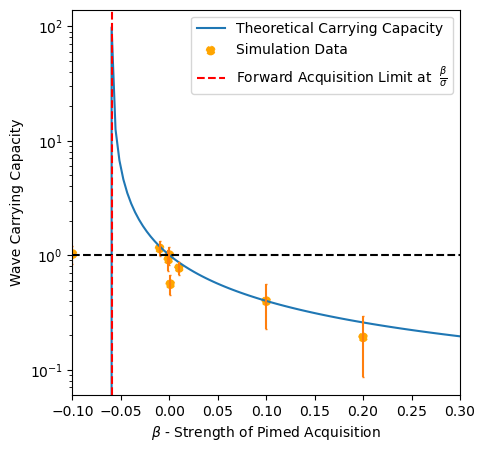

In [9]:
beta_range = np.linspace(-0.1, 0.3, 100)
plt.figure(figsize = [5, 5])
Y2 = ratio_exponent(beta_range)

plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.ylabel("Wave Carrying Capacity")
plt.xlim(-0.1, 0.3)
plt.plot(beta_range, Y2, label = "Theoretical Carrying Capacity")

plt.errorbar(betas, count_beta_normalized, yerr= var_beta_normalized,
                linestyle = "None", capsize = 1)

plt.scatter(betas, count_beta_normalized, color = "orange", linestyle = '--', label = "Simulation Data")

plt.plot(beta_range, np.ones_like(beta_range), linestyle = "--", color = "black")
# plt.vlines(0, min(Y2), max(Y2), linestyle = "--", color = "red")

vertical_line_x = -0.0595  # Adjust the x-coordinate where you want the line
plt.axvline(x=vertical_line_x, color="red", linestyle="--", label = "Forward Acquisition Limit at  "+r"$\frac{\beta}{\sigma}$")

plt.yscale('log')
plt.legend()

plt.show()